In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


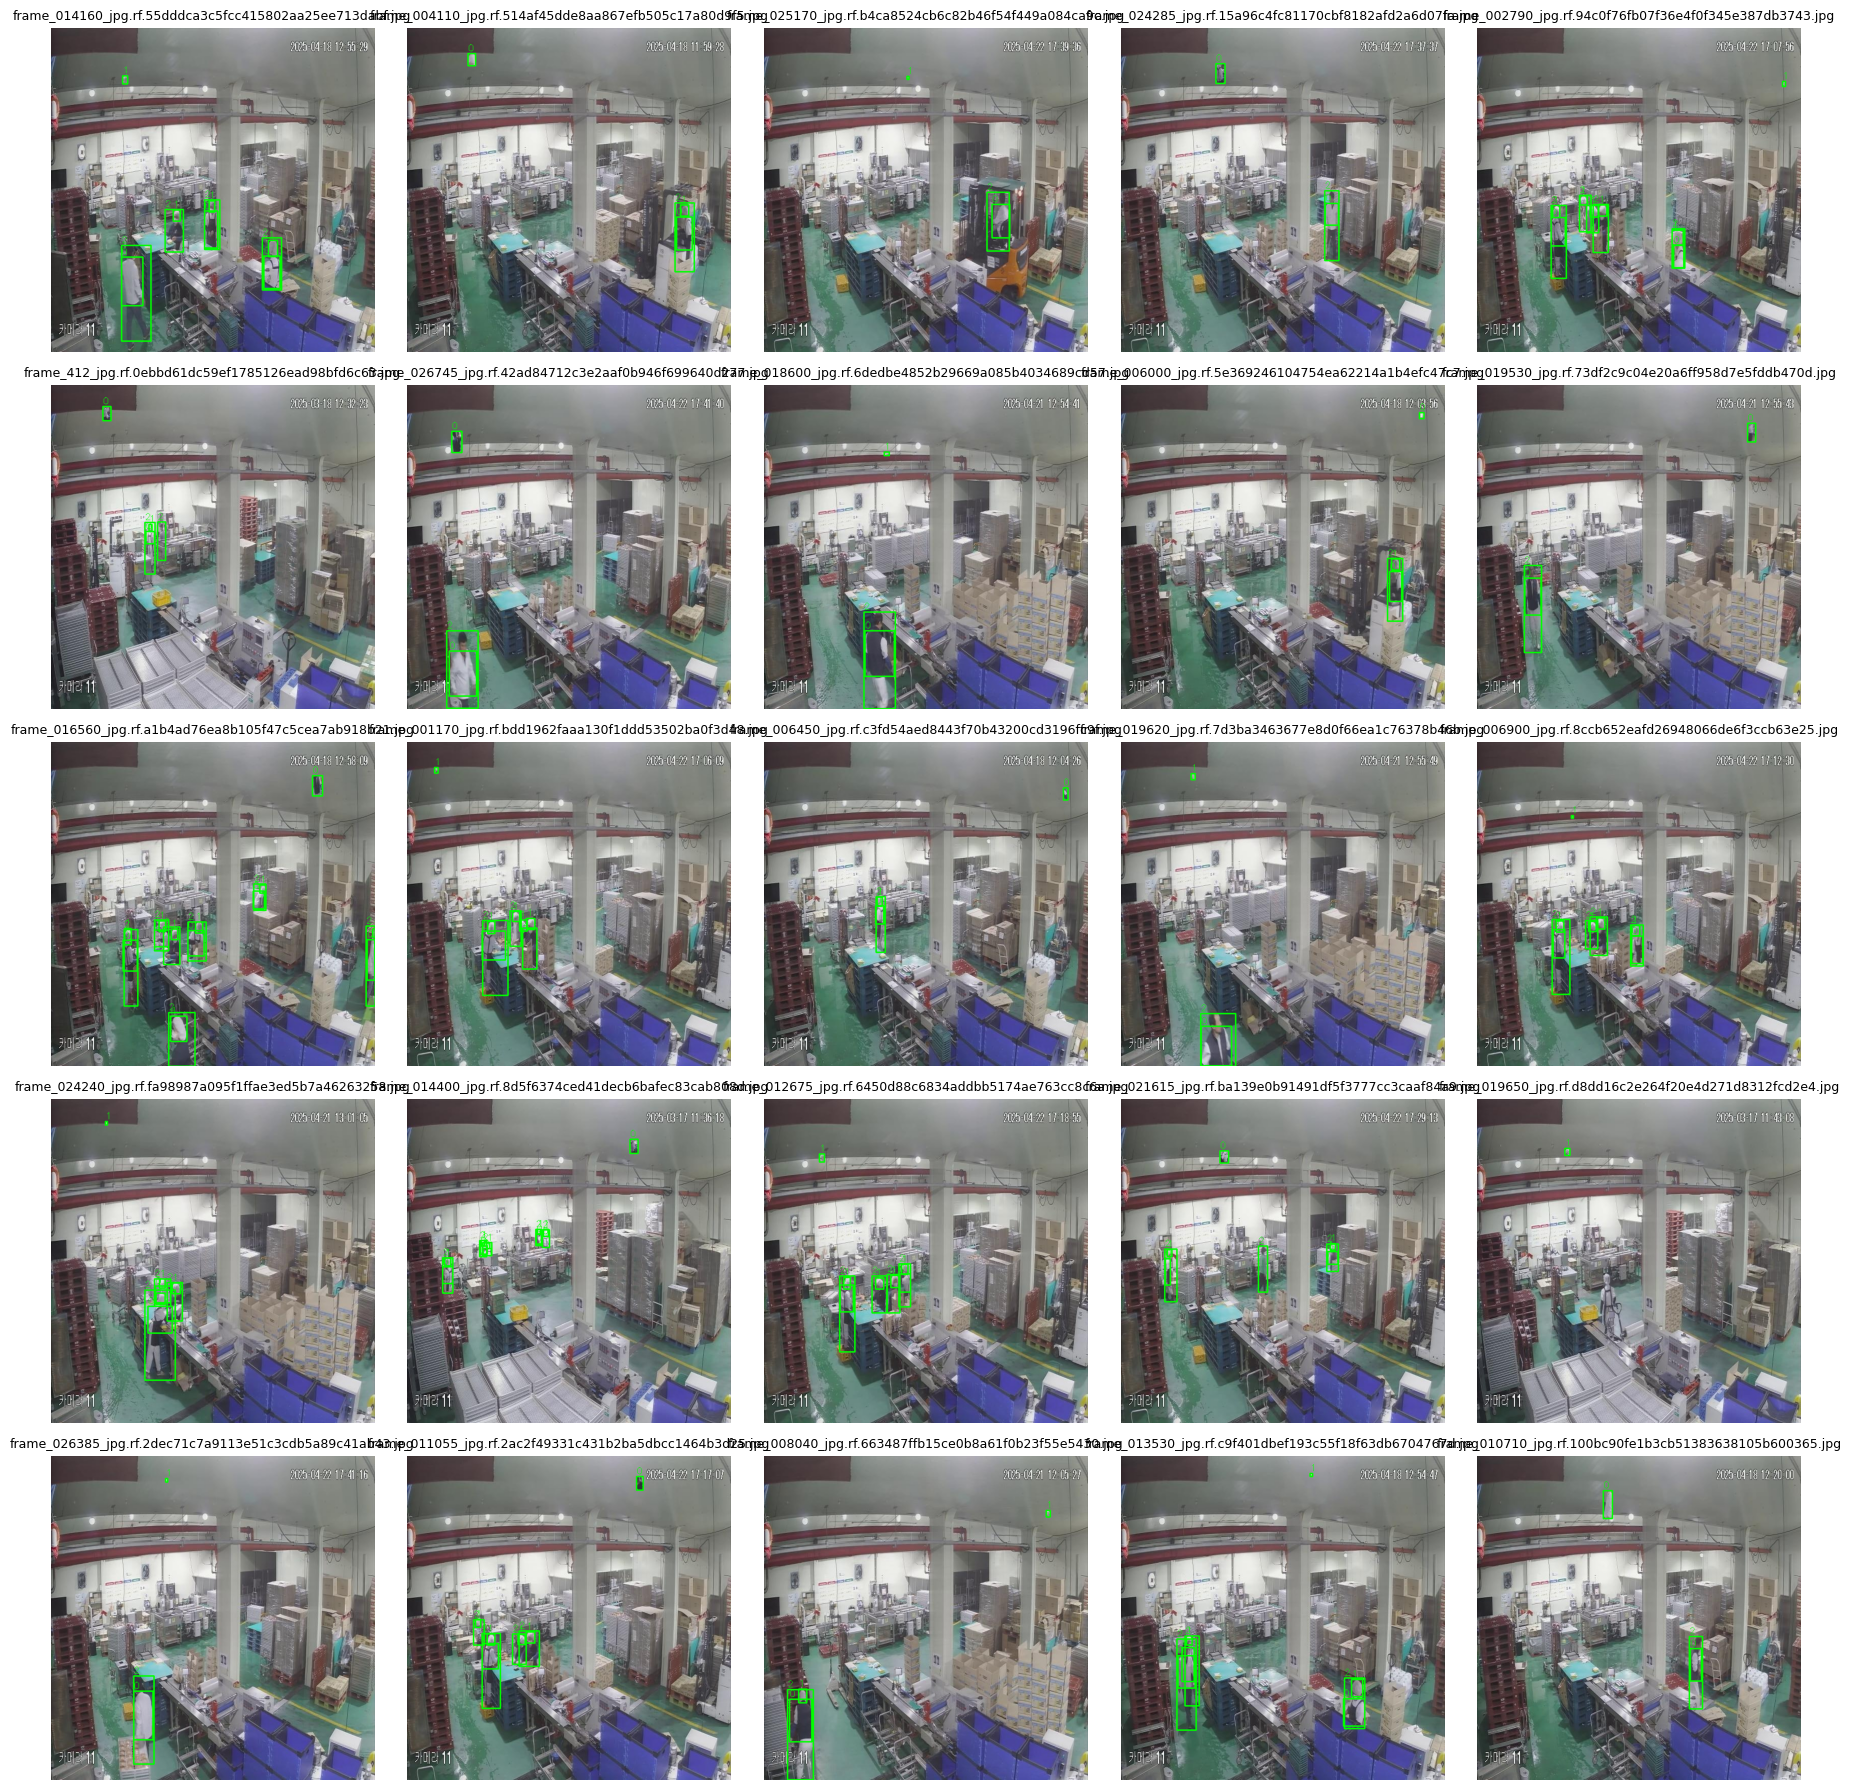

In [ ]:
import os, cv2, random
import matplotlib.pyplot as plt

# ==== 경로 ====
img_dir = "/content/drive/MyDrive/final_project/251003_04_copypaste_ceiling_positive_forced/images"
lbl_dir = "/content/drive/MyDrive/final_project/251003_04_copypaste_ceiling_positive_forced/labels"

# ==== 파라미터 ====
num_rows, num_cols = 5, 5  # 5x5 grid
num_samples = num_rows * num_cols

# ==== 시각화용 샘플 선택 ====
img_files = [f for f in os.listdir(img_dir) if f.endswith(".jpg")]
samples = random.sample(img_files, min(num_samples, len(img_files)))

# ==== 시각화 ====
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))
axes = axes.flatten()

for idx, img_file in enumerate(samples):
    img_path = os.path.join(img_dir, img_file)
    lbl_path = os.path.join(lbl_dir, img_file.replace(".jpg", ".txt"))
    img = cv2.imread(img_path)
    if img is None:
        axes[idx].axis("off")
        continue
    h, w, _ = img.shape

    # ==== YOLO 라벨 표시 ====
    if os.path.exists(lbl_path):
        with open(lbl_path, "r") as f:
            for line in f:
                cls, cx, cy, bw, bh = map(float, line.strip().split())
                x1 = int((cx - bw / 2) * w)
                y1 = int((cy - bh / 2) * h)
                x2 = int((cx + bw / 2) * w)
                y2 = int((cy + bh / 2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(img, f"{int(cls)}", (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 1)

    # ==== 표시 ====
    axes[idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[idx].set_title(img_file, fontsize=9)
    axes[idx].axis("off")

# 남은 축 비우기
for ax in axes[len(samples):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# ✅ YOLOv5 호환 Ceiling Paste Positive (Forced)용 data.yaml 생성
data_yaml_pos_forced_v5 = """
# YOLOv5 Data Configuration (Ceiling Paste Positive - Forced)

train: /content/drive/MyDrive/final_project/251003_04_copypaste_ceiling_positive_forced/images
val: /content/drive/MyDrive/final_project/baseline/camera11_yolo_dataset/images/valid
test: /content/drive/MyDrive/final_project/baseline/camera11_yolo_dataset/images/test

nc: 3
names: ['gown_on', 'hairnet_on', 'person']
"""

# 파일 저장
with open("/content/drive/MyDrive/final_project/data_ceiling_positive_forced_v5.yaml", "w") as f:
    f.write(data_yaml_pos_forced_v5)

print("✅ YOLOv5용 data.yaml 생성 완료: /content/drive/MyDrive/final_project/data_ceiling_positive_forced_v5.yaml")


✅ YOLOv5용 data.yaml 생성 완료: /content/drive/MyDrive/final_project/data_ceiling_positive_forced_v5.yaml


In [ ]:
# YOLOv5 공식 저장소 설치
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# 의존성 패키지 설치
!pip install -r requirements.txt -q


Cloning into 'yolov5'...
remote: Enumerating objects: 17639, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 17639 (delta 11), reused 8 (delta 8), pack-reused 17601 (from 3)
Receiving objects: 100% (17639/17639), 17.01 MiB | 22.56 MiB/s, done.
Resolving deltas: 100% (11990/11990), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.4 MB/s eta 0:00:00


In [ ]:
# ✅ 실험 이름 지정
exp_name_pos_forced = "251027_ceiling_positive_forced_yolov5n"

# ✅ YOLOv5n 학습 실행 (640 / 50epoch / forced positive)
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data /content/drive/MyDrive/final_project/data_ceiling_positive_forced_v5.yaml \
  --weights yolov5n.pt \
  --project /content/drive/MyDrive/final_project/runs/ \
  --name {exp_name_pos_forced} \
  --exist-ok


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-27 12:52:28.453334: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761569548.475002    3100 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761569548.481472    3100 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [ ]:
import os

# ===== 경로 설정 =====
img_dir = "/content/drive/MyDrive/final_project/251003_04_copypaste_ceiling_positive/images"
lbl_dir = "/content/drive/MyDrive/final_project/251003_04_copypaste_ceiling_positive/labels"

# ===== 파일 목록 읽기 =====
img_ext = [".jpg", ".jpeg", ".png"]
images = [os.path.splitext(f)[0] for f in os.listdir(img_dir) if os.path.splitext(f)[1].lower() in img_ext]
labels = [os.path.splitext(f)[0] for f in os.listdir(lbl_dir) if f.endswith(".txt")]

# ===== 매칭 비교 =====
no_label = sorted(set(images) - set(labels))
no_image = sorted(set(labels) - set(images))

print(f"📸 총 이미지 개수: {len(images)}")
print(f"📝 총 라벨 개수: {len(labels)}\n")

if no_label:
    print(f"⚠️ 라벨이 없는 이미지 {len(no_label)}개:")
    for f in no_label[:10]:
        print("  -", f)
else:
    print("✅ 모든 이미지에 라벨이 존재합니다.")

if no_image:
    print(f"\n⚠️ 이미지가 없는 라벨 {len(no_image)}개:")
    for f in no_image[:10]:
        print("  -", f)
else:
    print("✅ 모든 라벨에 대응 이미지가 존재합니다.")


📸 총 이미지 개수: 481
📝 총 라벨 개수: 481

✅ 모든 이미지에 라벨이 존재합니다.
✅ 모든 라벨에 대응 이미지가 존재합니다.


In [ ]:
# ✅ YOLOv5s Baseline용 data.yaml 생성
data_yaml_baseline_v5 = """
# YOLOv5 Data Configuration (Baseline)

train: /content/drive/MyDrive/final_project/baseline/camera11_yolo_dataset/images/train
val: /content/drive/MyDrive/final_project/baseline/camera11_yolo_dataset/images/valid
test: /content/drive/MyDrive/final_project/baseline/camera11_yolo_dataset/images/test

nc: 3
names: ['gown_on', 'hairnet_on', 'person']
"""

with open("/content/drive/MyDrive/final_project/data_baseline_v5.yaml", "w") as f:
    f.write(data_yaml_baseline_v5)

print("✅ YOLOv5s Baseline용 data.yaml 생성 완료: /content/drive/MyDrive/final_project/data_baseline_v5.yaml")


✅ YOLOv5s Baseline용 data.yaml 생성 완료: /content/drive/MyDrive/final_project/data_baseline_v5.yaml


In [ ]:
# ✅ YOLOv5s Ceiling Copy-Paste Positive용 data.yaml 생성
data_yaml_ceiling_v5 = """
# YOLOv5 Data Configuration (Ceiling Copy-Paste Positive)

train: /content/drive/MyDrive/final_project/251003_04_copypaste_ceiling_positive/images
val: /content/drive/MyDrive/final_project/baseline/camera11_yolo_dataset/images/valid
test: /content/drive/MyDrive/final_project/baseline/camera11_yolo_dataset/images/test

nc: 3
names: ['gown_on', 'hairnet_on', 'person']
"""

with open("/content/drive/MyDrive/final_project/data_ceiling_positive_v5.yaml", "w") as f:
    f.write(data_yaml_ceiling_v5)

print("✅ YOLOv5s Ceiling Copy-Paste Positive용 data.yaml 생성 완료: /content/drive/MyDrive/final_project/data_ceiling_positive_v5.yaml")


✅ YOLOv5s Ceiling Copy-Paste Positive용 data.yaml 생성 완료: /content/drive/MyDrive/final_project/data_ceiling_positive_v5.yaml


In [ ]:
# YOLOv5 설치
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# 의존성 설치
!pip install -r requirements.txt -q


Cloning into 'yolov5'...
remote: Enumerating objects: 17646, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 17646 (delta 13), reused 8 (delta 8), pack-reused 17601 (from 3)
Receiving objects: 100% (17646/17646), 17.01 MiB | 17.29 MiB/s, done.
Resolving deltas: 100% (11997/11997), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.4 MB/s eta 0:00:00


In [ ]:
# ===== Baseline 학습 =====
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data /content/drive/MyDrive/final_project/data_baseline_v5.yaml \
  --weights yolov5s.pt \
  --project /content/drive/MyDrive/final_project/runs/ \
  --name 251030_yolov5s_baseline_ep50_640 \
  --exist-ok

# ===== Ceiling Copy-Paste Positive 학습 =====
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data /content/drive/MyDrive/final_project/data_ceiling_positive_v5.yaml \
  --weights yolov5s.pt \
  --project /content/drive/MyDrive/final_project/runs/ \
  --name 251030_yolov5s_ceiling_pos_ep50_640 \
  --exist-ok


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
      26/49      4.04G    0.04814    0.02417    0.01461        166        640:  94% 29/31 [00:04<00:00,  7.13it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      26/49      4.04G    0.04821    0.02412    0.01466        180        640:  97% 30/31 [00:04<00:00,  6.86it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      26/49      4.04G    0.04873    0.02416    0.01491         15        640: 100% 31/31 [00:04<00:00,  7.23it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:01<00:00,  3.67it/s]
                   all        138       1121      0.847      0.805      0.862      0.407

      Epoch    GPU_mem   bo

✅ 총 3개의 결과 이미지가 발견되었습니다.

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 results.png


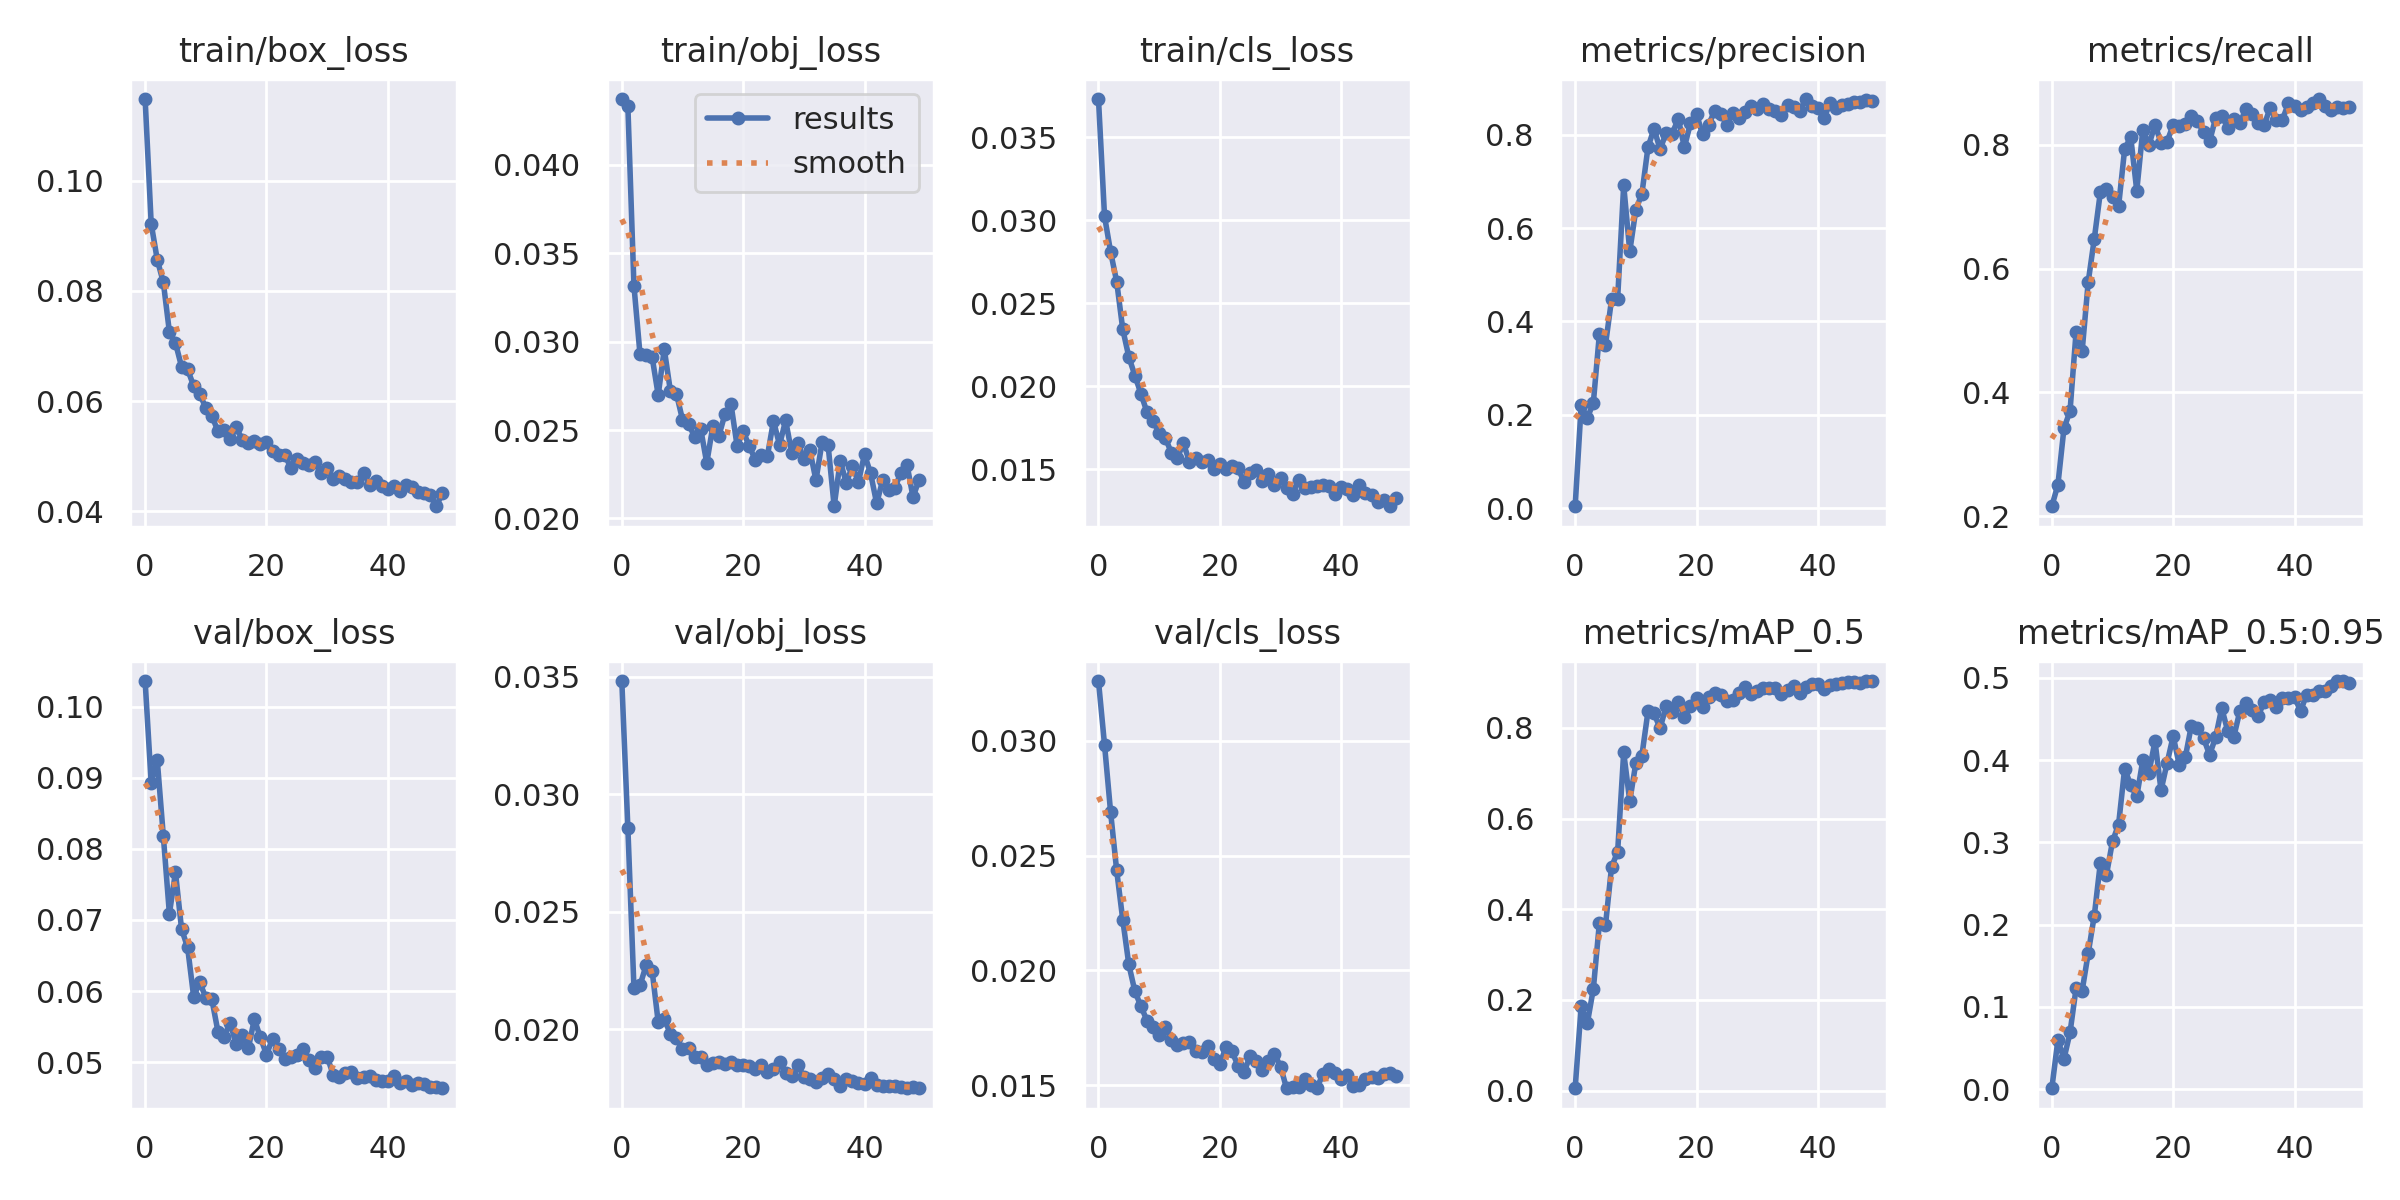

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 PR_curve.png


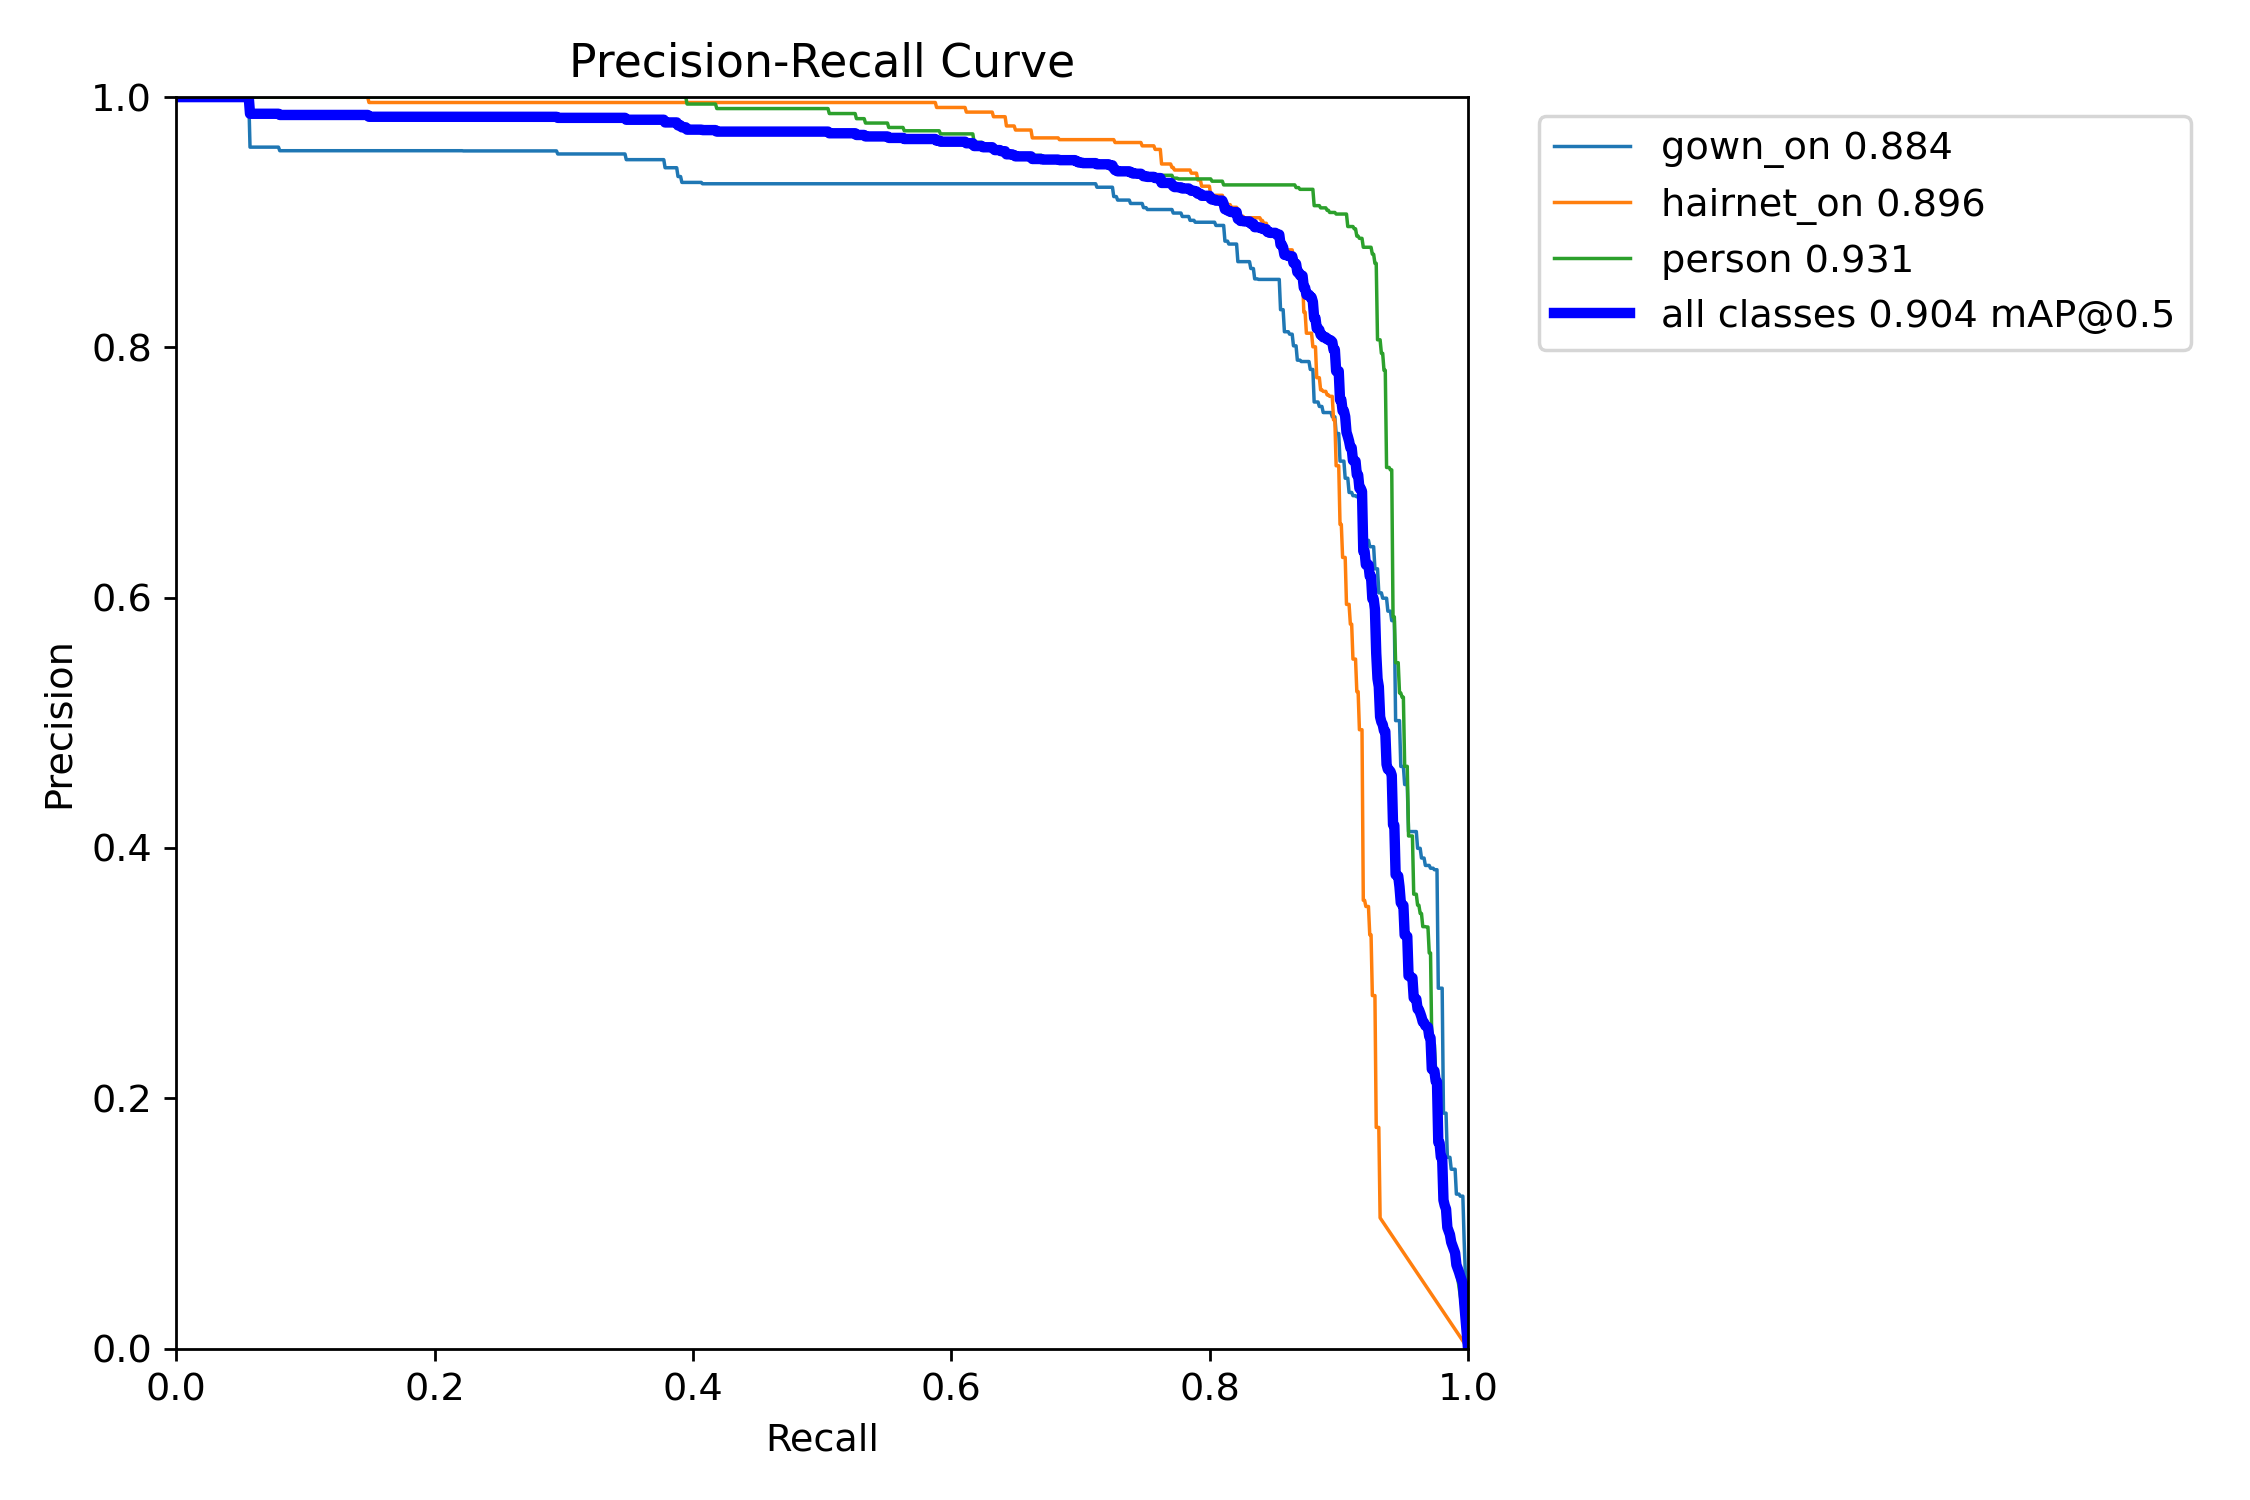

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 confusion_matrix.png


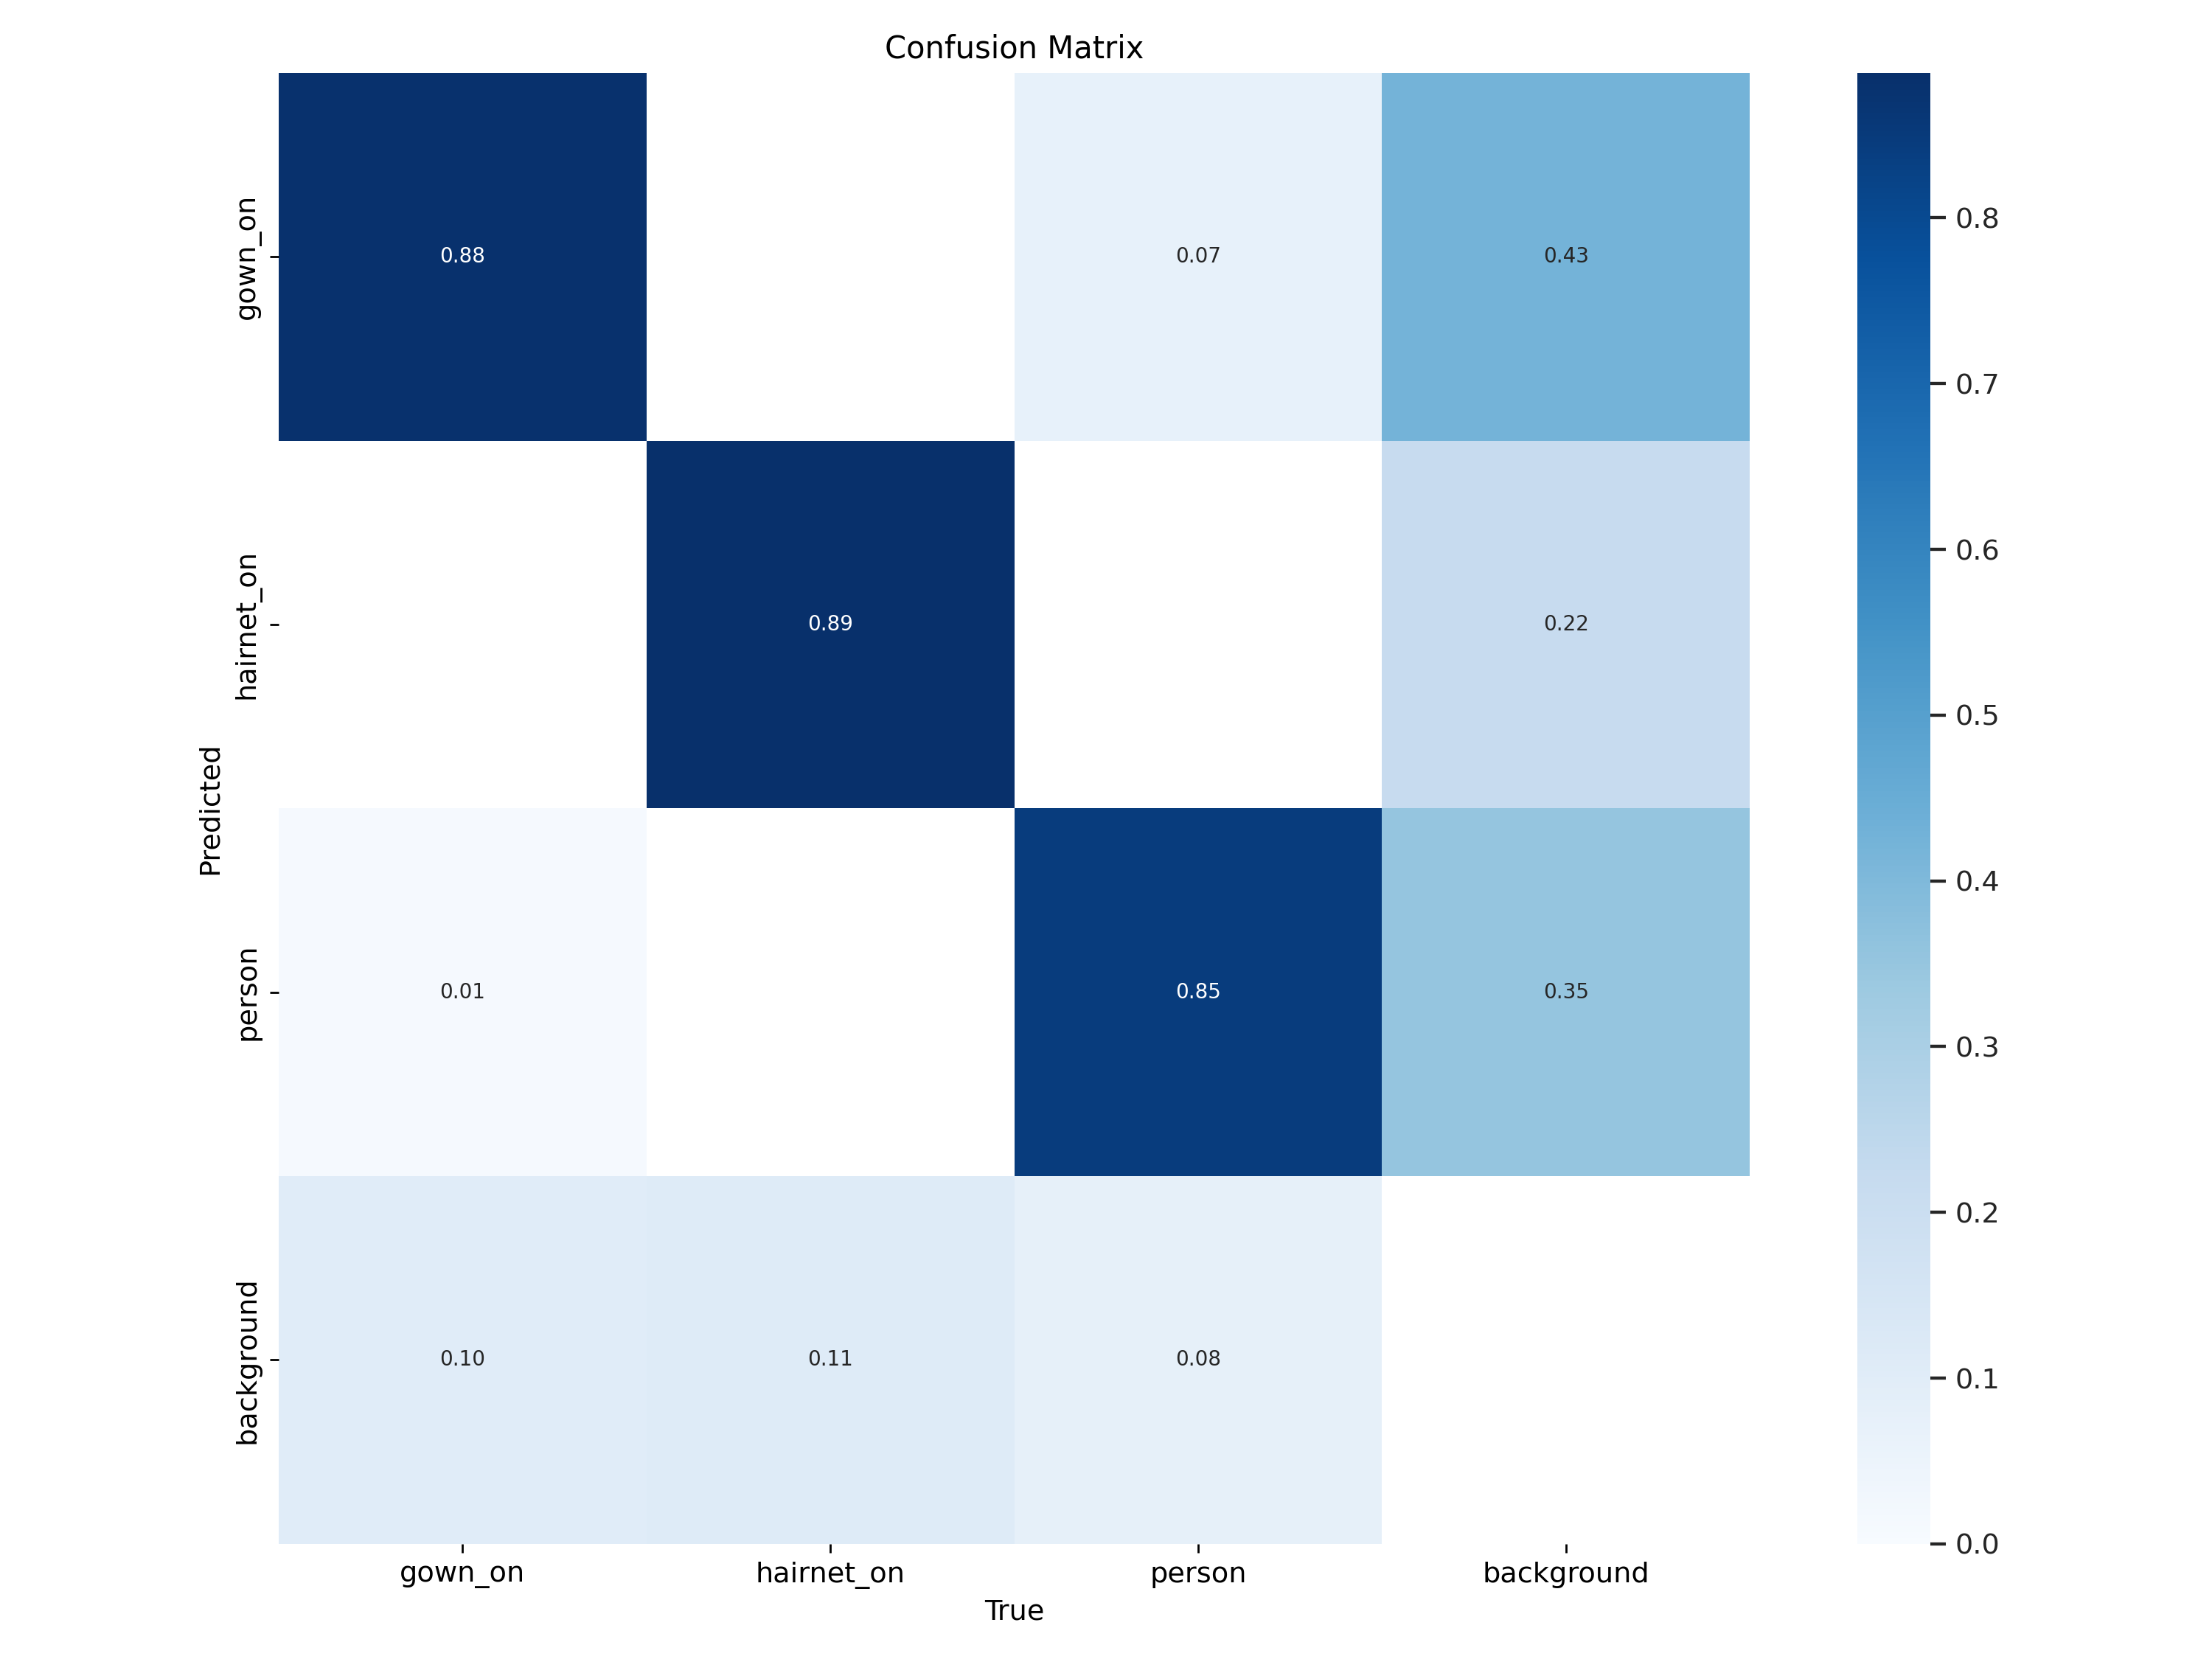

In [ ]:
import os, glob
from IPython.display import Image, display

# ===== 실험 결과 경로 설정 =====
result_dir = "/content/drive/MyDrive/final_project/runs/251030_yolov5s_baseline_ep50_640"

# ===== 표시할 주요 결과 파일 키워드 =====
keywords = ["results", "PR_curve", "confusion_matrix"]

# ===== 결과 이미지 탐색 =====
result_images = []
for img_path in glob.glob(f"{result_dir}/**/*.png", recursive=True):
    if any(keyword in os.path.basename(img_path) for keyword in keywords):
        result_images.append(img_path)

# ===== 정렬 (results → PR_curve → confusion_matrix 순) =====
order = {k: i for i, k in enumerate(keywords)}
result_images.sort(key=lambda x: order.get(next((k for k in keywords if k in x), ""), 999))

# ===== 시각화 출력 =====
if result_images:
    print(f"✅ 총 {len(result_images)}개의 결과 이미지가 발견되었습니다.\n")
    for img_path in result_images:
        print("━" * 70)
        print(f"📊 {os.path.basename(img_path)}")
        display(Image(filename=img_path))
else:
    print("⚠️ 결과 이미지(results.png, PR_curve.png, confusion_matrix.png)를 찾을 수 없습니다.")


✅ 총 3개의 결과 이미지가 발견되었습니다.

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 results.png


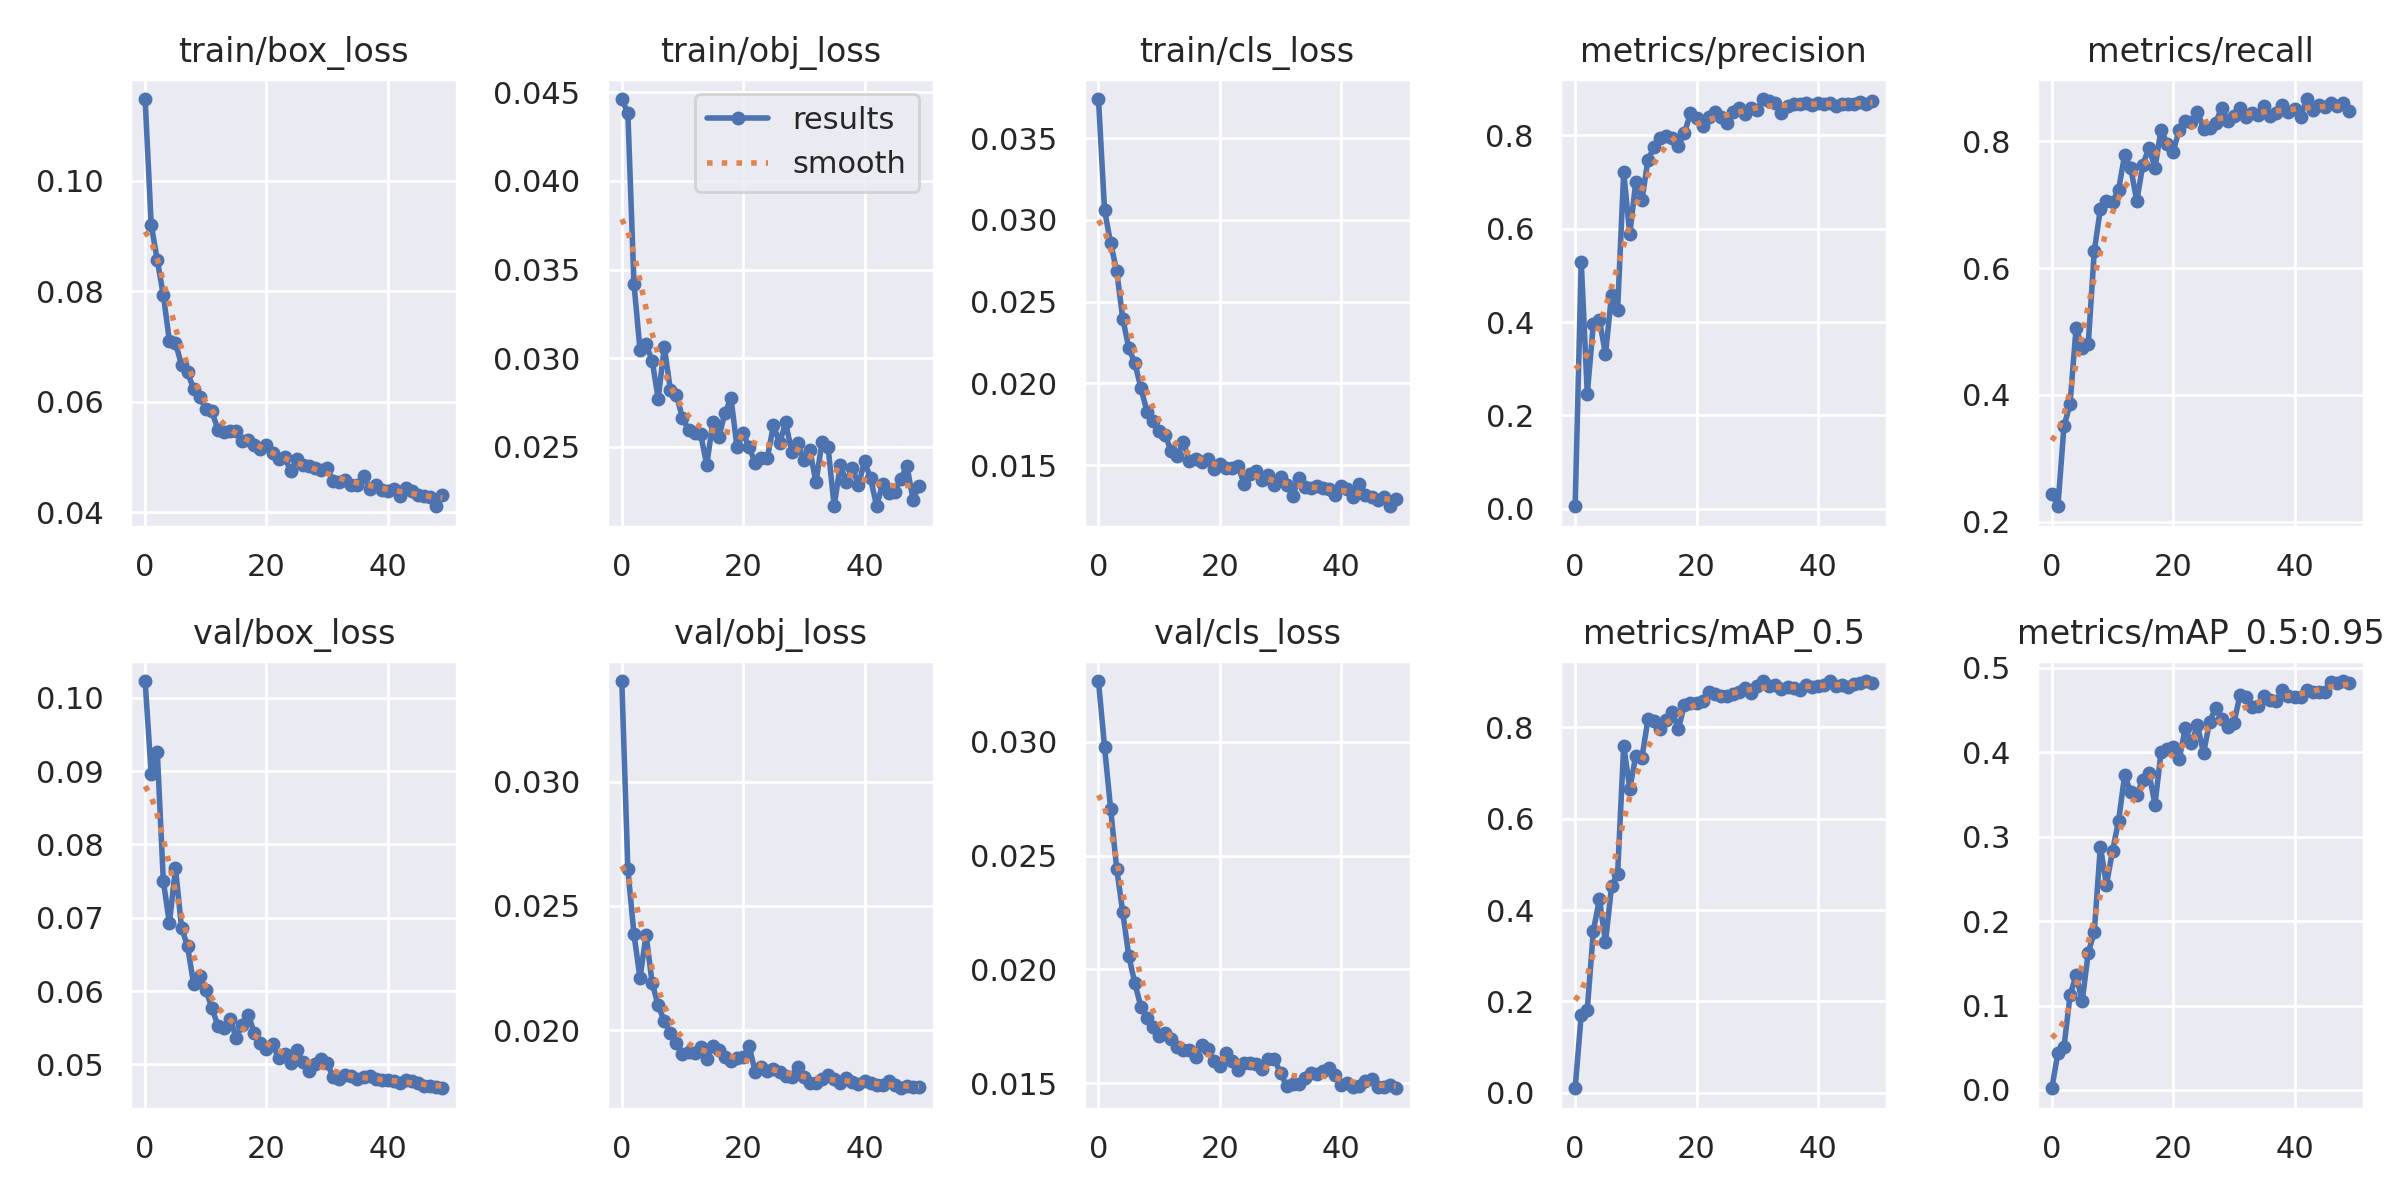

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 PR_curve.png


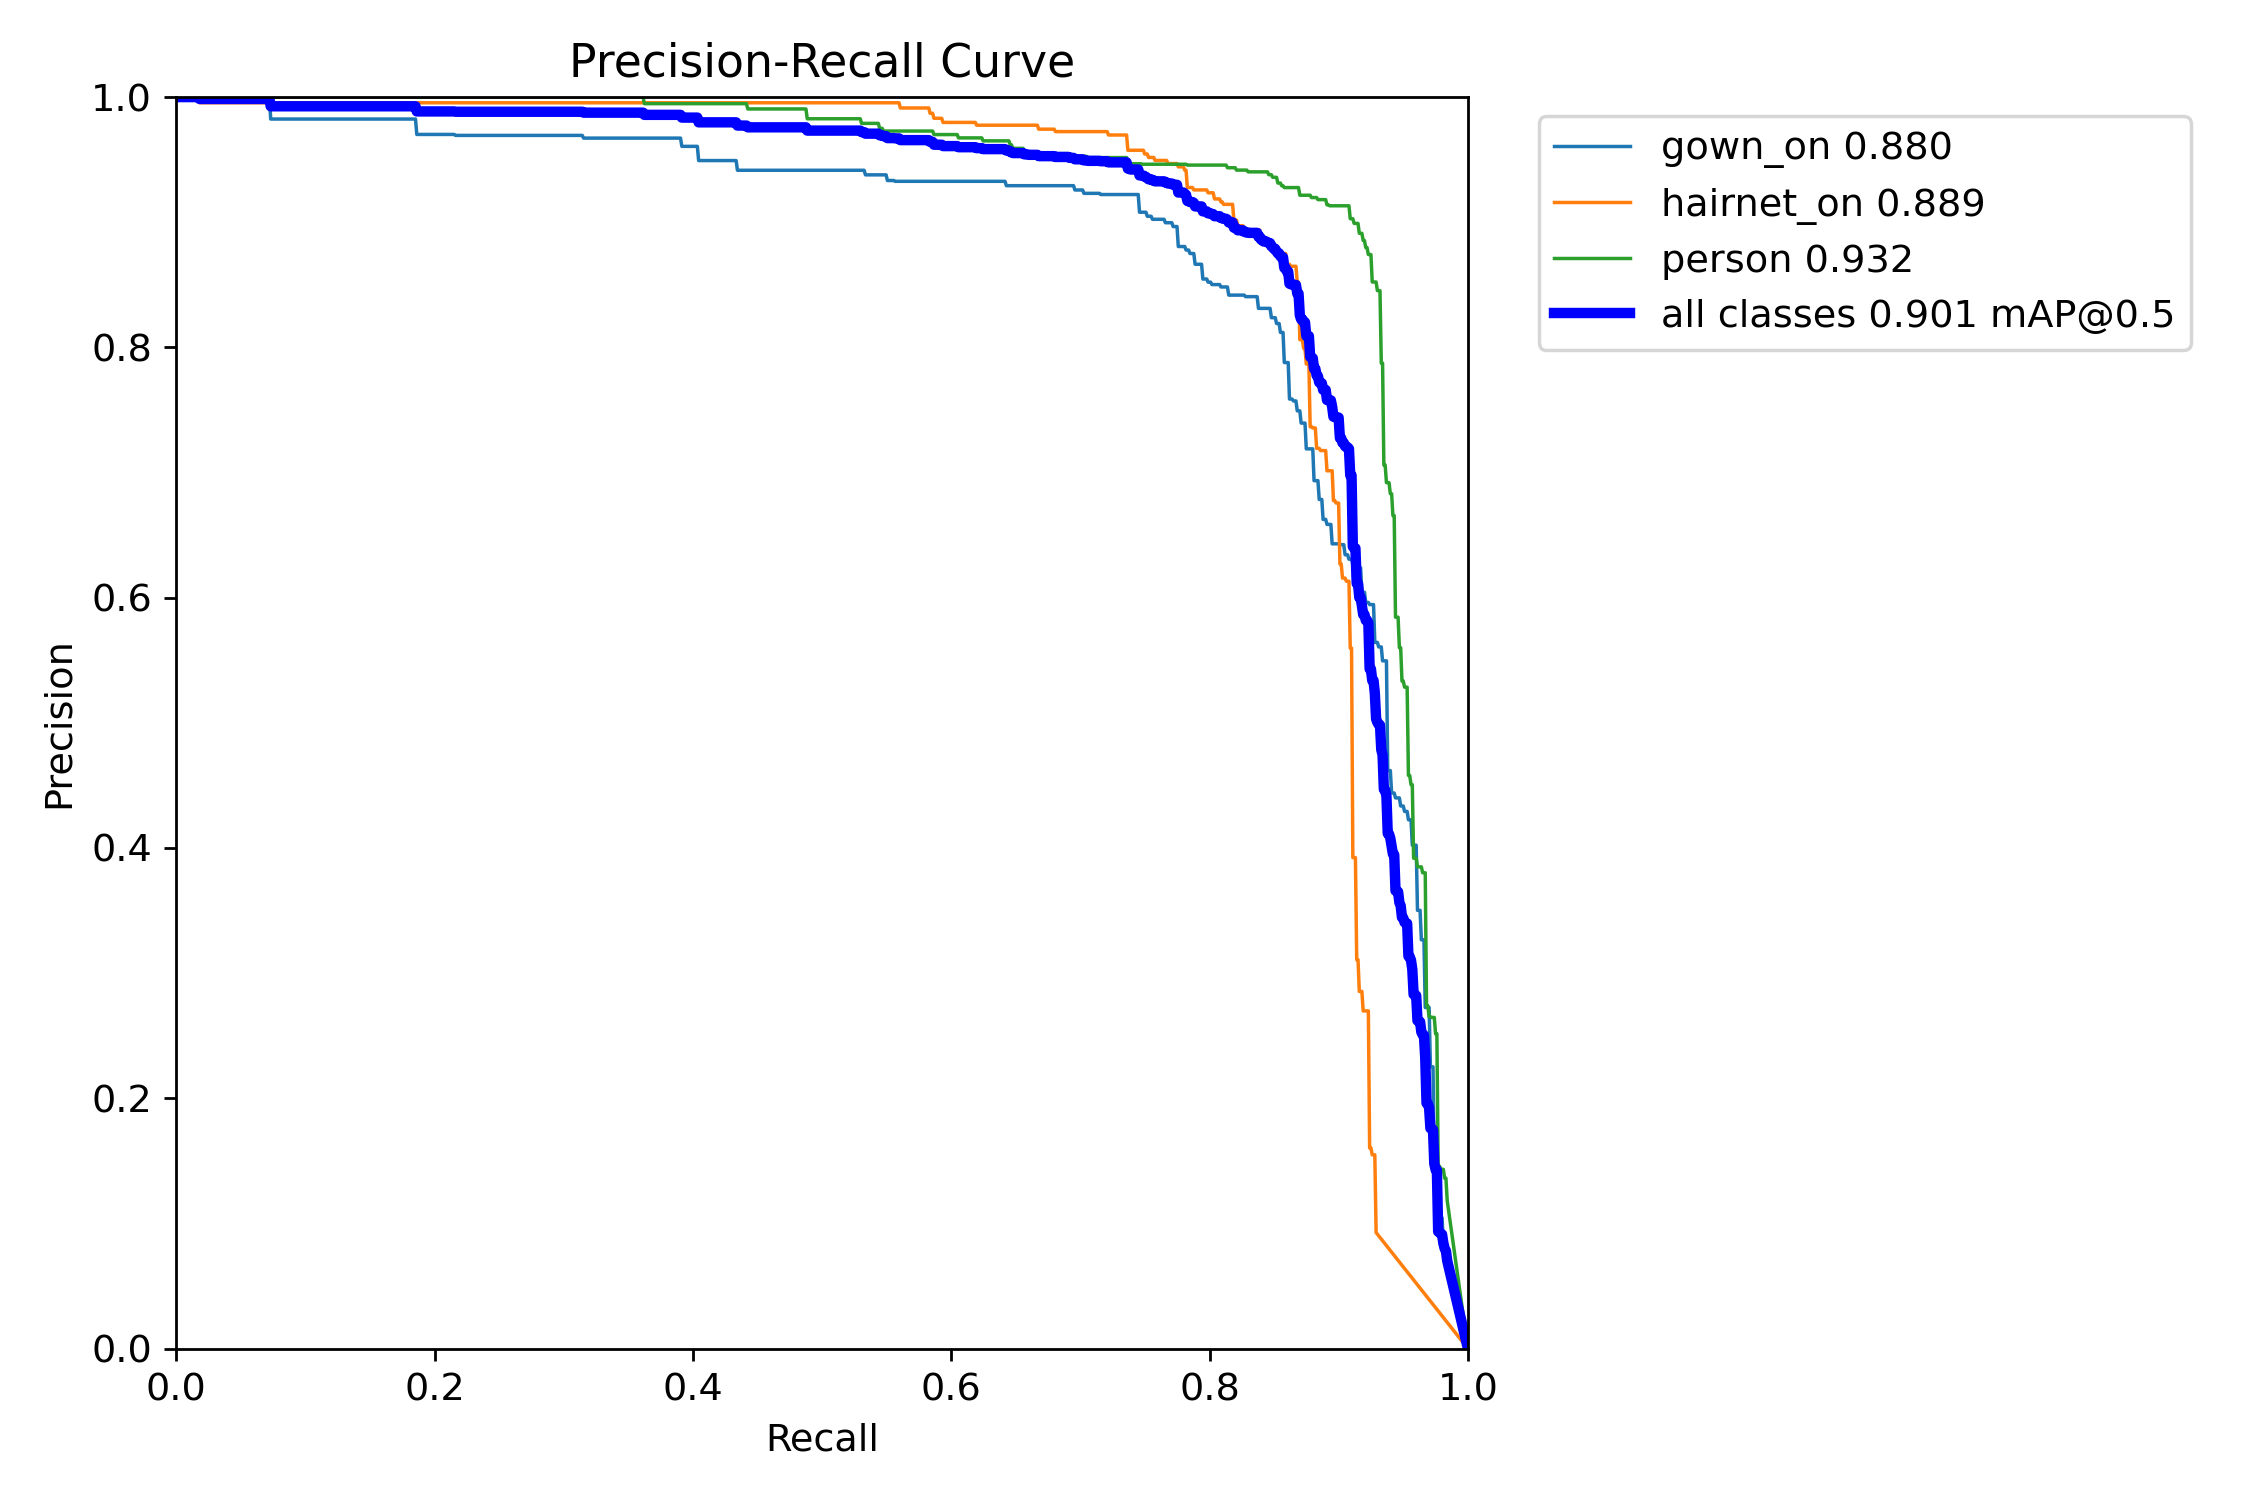

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 confusion_matrix.png


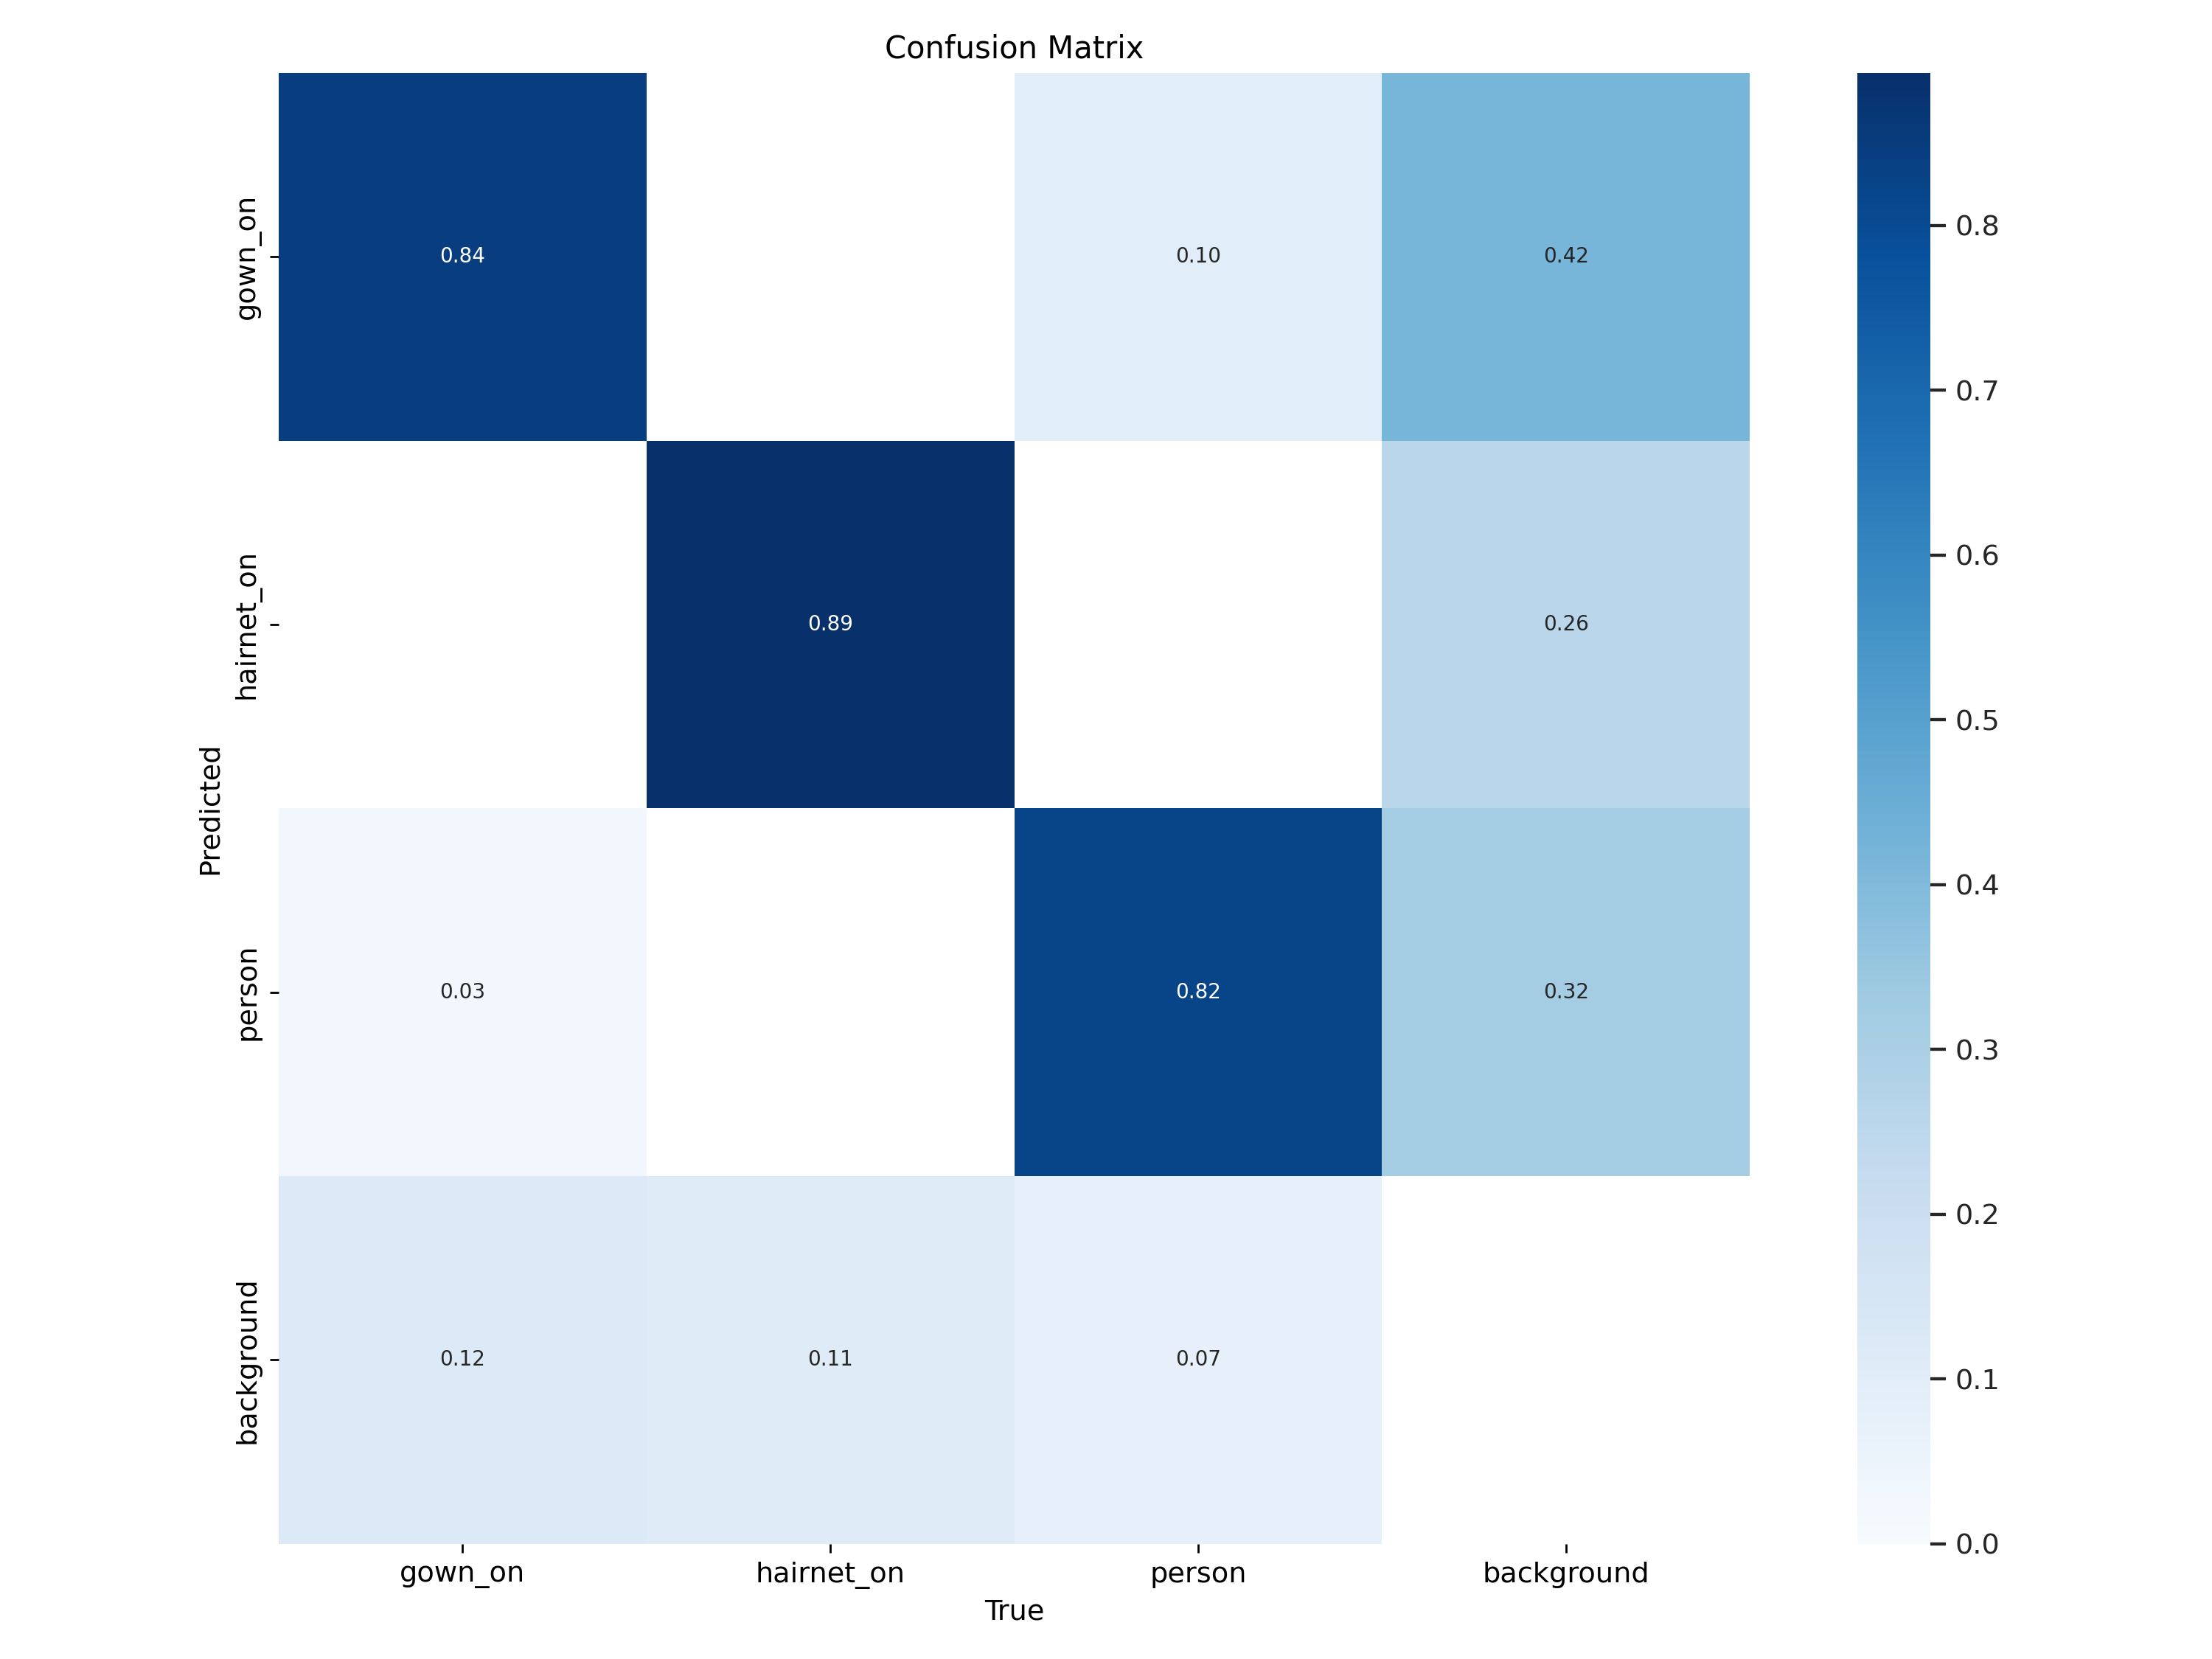

In [ ]:
import os, glob
from IPython.display import Image, display

# ===== 실험 결과 경로 설정 =====
result_dir = "/content/drive/MyDrive/final_project/runs/251030_yolov5s_ceiling_pos_ep50_640"

# ===== 표시할 주요 결과 파일 키워드 =====
keywords = ["results", "PR_curve", "confusion_matrix"]

# ===== 결과 이미지 탐색 =====
result_images = []
for img_path in glob.glob(f"{result_dir}/**/*.png", recursive=True):
    if any(keyword in os.path.basename(img_path) for keyword in keywords):
        result_images.append(img_path)

# ===== 정렬 (results → PR_curve → confusion_matrix 순) =====
order = {k: i for i, k in enumerate(keywords)}
result_images.sort(key=lambda x: order.get(next((k for k in keywords if k in x), ""), 999))

# ===== 시각화 출력 =====
if result_images:
    print(f"✅ 총 {len(result_images)}개의 결과 이미지가 발견되었습니다.\n")
    for img_path in result_images:
        print("━" * 70)
        print(f"📊 {os.path.basename(img_path)}")
        display(Image(filename=img_path))
else:
    print("⚠️ 결과 이미지(results.png, PR_curve.png, confusion_matrix.png)를 찾을 수 없습니다.")


In [ ]:
# ✅ YOLOv5 호환 Ceiling Paste Positive (Forced)용 data.yaml 생성
data_yaml_pos_forced_v5 = """
# YOLOv5 Data Configuration (Ceiling Paste Positive - Forced)

train: /content/drive/MyDrive/final_project/251003_04_copypaste_ceiling_positive_forced/images
val: /content/drive/MyDrive/final_project/baseline/camera11_yolo_dataset/images/valid
test: /content/drive/MyDrive/final_project/baseline/camera11_yolo_dataset/images/test

nc: 3
names: ['gown_on', 'hairnet_on', 'person']
"""

# 파일 저장
with open("/content/drive/MyDrive/final_project/data_ceiling_positive_forced_v5.yaml", "w") as f:
    f.write(data_yaml_pos_forced_v5)

print("✅ YOLOv5용 data.yaml 생성 완료: /content/drive/MyDrive/final_project/data_ceiling_positive_forced_v5.yaml")


✅ YOLOv5용 data.yaml 생성 완료: /content/drive/MyDrive/final_project/data_ceiling_positive_forced_v5.yaml


In [ ]:
# ===== Ceiling Copy-Paste Positive 학습 =====
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data /content/drive/MyDrive/final_project/data_ceiling_positive_forced_v5.yaml \
  --weights yolov5s.pt \
  --project /content/drive/MyDrive/final_project/runs/ \
  --name 251030_yolov5s_ceiling_pos_multi_ep50_640 \
  --exist-ok

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-30 11:07:25.659405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761822445.681699   12404 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761822445.688390   12404 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761822445.705365   12404 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761822445.705404   12404 computation_placer.cc:177] computation placer already registere